#Gathering Data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer


In [0]:
a = pd.read_csv("twitter-archive-enhanced.csv")
a.shape

(2356, 17)

In [0]:
a.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [0]:
a.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [0]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

b = pd.read_csv("image-predictions.tsv", sep='\t')
b.shape

(2075, 12)

In [0]:
b.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [0]:
b.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [0]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [0]:
d = pd.read_json("tweet-json.txt", orient = 'records', lines = True)
d.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [0]:
c= d[["id", "retweet_count", "favorite_count"]].copy()
c= c.rename(columns={"id": "tweet_id"})
c.shape

(2354, 3)

In [0]:
c.head(3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


#Assessing Data

Copying the original datasets

In [0]:
a_clean = a.copy()
b_clean = b.copy()
c_clean = c.copy()

**1) All the three datasets should be merged** (Tidiness Issue)

In [0]:
df = b.merge(a, on='tweet_id', how='inner').merge(c, on='tweet_id', how='inner')
df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'timestamp', 'source', 'text',
       'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweet_count', 'favorite_count'],
      dtype='object')

Copying the original dataset

In [0]:
df_clean = df.copy()

Check if there are any  duplicates, drop duplicate rows if they exist

In [0]:
sum(df.duplicated())

0

Assessing each Variable

*Variable 'tweet_id'*

In [0]:
df.tweet_id.unique()

array([666020888022790149, 666029285002620928, 666033412701032449, ...,
       891815181378084864, 892177421306343426, 892420643555336193])

Inference:
* It contains all the unique ids of each tweet in the appropriate data type

*Variable jpg_url*

In [0]:
df.jpg_url.unique()

array(['https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
       'https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg',
       'https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg', ...,
       'https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg',
       'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
       'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg'], dtype=object)

Inference:
* It contains all the unique urls of images of each tweet in the appropriate data type

*Variable img_num*

In [0]:
df.img_num.value_counts()

1    1779
2     197
3      66
4      31
Name: img_num, dtype: int64

Inference:
* It contains the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images) in the appropriate datatype
* The column name could be renamed so it is understood better

*Variable p1*

In [0]:
df.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

Inference:
* It contains the algorithm's #1 prediction for the image in the tweet
* The contains values like 'hen', 'ox' 'desktop computer' which aren't breeds of dogs and could be removed for higher accuracy

*Variable 'p1_conf'*

In [0]:
df.p1_conf.unique()

array([0.465074 , 0.506826 , 0.596461 , ..., 0.716012 , 0.323581 ,
       0.0970486])

Inference:
* It shows how confident the algorithm is in its #1 prediction
* The column is in the appropriate datatype, float

*Variable 'p1_dog'*

In [0]:
df.p1_dog.unique

<bound method Series.unique of 0        True
1        True
2        True
3        True
4        True
        ...  
2068     True
2069    False
2070     True
2071     True
2072    False
Name: p1_dog, Length: 2073, dtype: bool>

Inference:
* It shows whether or not the #1 prediction is a breed of dog
* The column is in the appropriate datatype, boolean

Similar inference follow for variables 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog' as above since they're derived by the same method

*Variable 'in_reply_to_status_id'*

In [0]:
df.in_reply_to_status_id.unique()

array([           nan, 6.67806455e+17, 6.71561002e+17, 6.74752233e+17,
       6.71729907e+17, 6.74793399e+17, 6.74999808e+17, 6.75497103e+17,
       6.75707330e+17, 6.84222868e+17, 6.84481075e+17, 6.92041935e+17,
       6.70668383e+17, 6.75349384e+17, 7.03041950e+17, 6.67152164e+17,
       7.03255936e+17, 7.29113531e+17, 6.91416866e+17, 7.46885919e+17,
       7.33109485e+17, 7.59099524e+17, 8.55818117e+17])

Inference:
* It shows numerical value when the row is a reply to a tweet and nan value otherwise.
* Since, we want only original tweets, we should drop rows which are replies to tweets

*Variable 'in_reply_to_user_id'*

In [0]:
df.in_reply_to_user_id.unique()

array([           nan, 4.19698384e+09])

Inference:
* It shows numerical value when the row is a reply to a tweet and nan value otherwise.
* Since, we want only original tweets, we should drop rows which are replies to tweets

*Variable 'timestamp'*

In [0]:
df.timestamp.unique()

array(['2015-11-15 22:32:08 +0000', '2015-11-15 23:05:30 +0000',
       '2015-11-15 23:21:54 +0000', ..., '2017-07-31 00:18:03 +0000',
       '2017-08-01 00:17:27 +0000', '2017-08-01 16:23:56 +0000'],
      dtype=object)

Inference:
* It shows the time of the tweet.
* The format of data is object whereas it should be datatime format.

*Variable 'source'*

In [0]:
df.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

Inference:
* It shows source of the tweet
* The datatype is in the appropriate format of object

*Variable 'text'*

In [0]:
df.text.unique()

array(['Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj',
       'This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI',
       'Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR',
       ...,
       'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB',
       "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
       "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"],
      dtype=object)

Inference:
* It shows text of the tweet
* The datatype is in the appropriate format of object
* The name of the dog, gender of the dog can be extracted from this column

*Variable 'retweeted_status_id'*

In [0]:
df.retweeted_status_id.unique()

array([           nan, 6.67548415e+17, 6.67548696e+17, 7.11998280e+17,
       6.75354436e+17, 6.79158374e+17, 7.57597141e+17, 6.79062614e+17,
       6.70319131e+17, 7.39544079e+17, 7.11694788e+17, 6.85325113e+17,
       7.25842289e+17, 7.41067307e+17, 6.73320133e+17, 7.65222099e+17,
       7.33109485e+17, 6.79828447e+17, 7.50429298e+17, 7.03041950e+17,
       7.80465709e+17, 7.42423170e+17, 7.07610949e+17, 6.74291837e+17,
       7.79834333e+17, 7.61004548e+17, 7.89986466e+17, 7.63837566e+17,
       7.91672323e+17, 7.88765915e+17, 7.89530877e+17, 7.96149749e+17,
       7.71770457e+17, 6.67509364e+17, 6.70444956e+17, 6.71896809e+17,
       6.75501076e+17, 7.01214701e+17, 7.12809026e+17, 7.75085133e+17,
       7.76113306e+17, 7.79056096e+17, 7.77684234e+17, 6.91416866e+17,
       7.84826020e+17, 7.82722599e+17, 7.83334640e+17, 7.82969140e+17,
       8.01167903e+17, 7.93962222e+17, 7.90277117e+17, 7.32005617e+17,
       7.90946056e+17, 8.15966073e+17, 7.73547597e+17, 8.19006401e+17,
      

Inference:
* It shows numerical value when the row is a retweet and nan value otherwise.
* Since, we want only original tweets, we should drop rows which are retweets

*Variable 'retweeted_status_user_id'*

In [0]:
df.retweeted_status_user_id.unique()

array([           nan, 4.29683174e+09, 7.83214000e+05, 4.19698384e+09,
       2.80479778e+08, 1.22832566e+09, 4.87197737e+08, 7.26634734e+08,
       8.11740824e+08, 4.11984180e+07, 5.97064155e+08, 3.41021133e+08,
       3.63890752e+08, 7.87461778e+17, 5.12804507e+08])

Inference:
* It shows numerical value of the user's id when the row is a retweet and nan value otherwise.
* Since, we want only original tweets, we should drop rows which are retweets

*Variable 'retweeted_status_timestamp'*

In [0]:
df.retweeted_status_timestamp.unique()

array([nan, '2015-11-20 03:41:59 +0000', '2015-11-20 03:43:06 +0000',
       '2016-03-21 19:29:52 +0000', '2015-12-11 16:40:19 +0000',
       '2015-12-22 04:35:49 +0000', '2016-07-25 15:23:28 +0000',
       '2015-12-21 22:15:18 +0000', '2015-11-27 19:11:49 +0000',
       '2016-06-05 19:47:03 +0000', '2016-03-20 23:23:54 +0000',
       '2016-01-08 05:00:14 +0000', '2016-04-29 00:21:01 +0000',
       '2016-06-10 00:39:48 +0000', '2015-12-06 01:56:44 +0000',
       '2016-08-15 16:22:20 +0000', '2016-05-19 01:38:16 +0000',
       '2015-12-24 00:58:27 +0000', '2016-07-05 20:41:01 +0000',
       '2016-02-26 02:20:37 +0000', '2016-09-26 17:55:00 +0000',
       '2016-06-13 18:27:32 +0000', '2016-03-09 16:56:11 +0000',
       '2015-12-08 18:17:56 +0000', '2016-09-25 00:06:08 +0000',
       '2016-08-04 01:03:17 +0000', '2016-10-23 00:27:05 +0000',
       '2016-08-11 20:40:41 +0000', '2016-10-27 16:06:04 +0000',
       '2016-10-19 15:37:03 +0000', '2016-10-21 18:16:44 +0000',
       '2016-11-09 0

Inference:
* It shows timestamp of tweet when the row is a retweet and nan value otherwise.
* Since, we want only original tweets, we should drop rows which are retweets

*Variable 'expanded_urls'*

In [0]:
df.expanded_urls.unique()

array(['https://twitter.com/dog_rates/status/666020888022790149/photo/1',
       'https://twitter.com/dog_rates/status/666029285002620928/photo/1',
       'https://twitter.com/dog_rates/status/666033412701032449/photo/1',
       ...,
       'https://twitter.com/dog_rates/status/891815181378084864/photo/1',
       'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
       'https://twitter.com/dog_rates/status/892420643555336193/photo/1'],
      dtype=object)

Inference:
* It shows the expanded urls in the tweet
* The datatype of this column is appropriate, object

Variable 'rating_numerator'

In [0]:
df.rating_numerator.unique()

array([   8,    7,    9,    6,    5,   10,    2,   11,    1,    3,   12,
          4,   13,  420,   88,  144,   26,  121,  143,   14,   44,   60,
         45,   80,   99,   50,  204,    0, 1776,  165,   27,   75,   24,
         84,   15])

Inference:
* It shows the dog's rating out of 10

* Some of the ratings are 0 or below 10 which is against the
unique rating system of WeRateDogs where the rating numerators are greater than the denominators.

* Thus, the rows having lesser ratings could be dropped.

*Variable 'rating_denominator'*

In [0]:
df.rating_denominator.value_counts()

10     2055
50        3
11        2
80        2
7         1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

Inference:
* It shows the denominator of the dog's rating

* Some of the ratings less than or more than 10 which is against the unique rating system of WeRateDogs where the dogs are rated out of 10.

* Thus, the rows having inaccurate data could be dropped.
* After which, since the column has just 1 value of 10 and doesn't provide a lot of different information, it could be dropped as well

*Variable 'name'*

In [0]:
df.name.unique()

array(['None', 'a', 'an', 'the', 'quite', 'Walter', 'Scout', 'Kreggory',
       'Jimothy', 'Christoper', 'Lugan', 'Josep', 'Jockson', 'Jeph',
       'Carll', 'Klevin', 'Keet', 'Dave', 'Clybe', 'Gabe', 'Pipsy',
       'Bradlay', 'Churlie', 'Kenneth', 'Clarence', 'Timison', 'Joshwa',
       'Genevieve', 'Fwed', 'Biden', 'Cupcake', 'Reese', 'Philippe',
       'Hall', 'Dook', 'Naphaniel', 'Frank', 'Kial', 'George', 'Olive',
       'Calvin', 'Filup', 'Shaggy', 'Tedrick', 'Stu', 'Erik',
       'Cleopatricia', 'Otis', 'Jiminy', 'Alfie', 'Skittles', 'Ron',
       'Torque', 'Bisquick', 'Jareld', 'Sophie', 'Rusty', 'DayZ', 'Jo',
       'Gòrdón', 'Spark', 'Marvin', 'Kallie', 'Jomathan', 'Maks',
       'Timofy', 'Zeek', 'Hanz', 'Winifred', 'Kevon', 'Banditt', 'Bobb',
       'Amélie', 'Ruffles', 'Lambeau', 'Herald', 'Jaycob', 'Jeremy',
       'Chaz', 'Ruby', 'Bernie', 'Harrison', 'Terrance', 'Tucker',
       'Samsom', 'Jaspers', 'Clarq', 'Ralf', 'Kirk', 'Sully', 'Tessa',
       'Dug', 'Saydee', 'Ch

Inference:
* It shows the names of the dogs

* The datatype of this column is appropriate

* However, it contains names like 'a' , 'an' , 'the' , 'my', 'quite' , 'by', 'all', 'just', 'his' which are erroneous
* It shoul be noted that all the names which are inaccrate start with small alphabets while all the names which are correct start with capital letters
*Thus all values which do not start with capital letters shold be dropped.

*Variable 'doggo'*

In [0]:
df.doggo.unique()

array(['None', 'doggo'], dtype=object)

Inference:
* It shows the lifecycle stage in which the dog is

* The datatype of this column is appropriate

*Variable 'floofer'*

In [0]:
df.floofer.unique()

array(['None', 'floofer'], dtype=object)

Inference:
* It shows the lifecycle stage in which the dog is

* The datatype of this column is appropriate

*Variable 'pupper'*

In [0]:
df.pupper.unique()

array(['None', 'pupper'], dtype=object)

Inference:
* It shows the lifecycle stage in which the dog is

* The datatype of this column is appropriate

*Variable 'puppo'*

In [0]:
df.puppo.unique()

array(['None', 'puppo'], dtype=object)

Inference:
* It shows the lifecycle stage in which the dog is

* The datatype of this column is appropriate

Inference:
* Since all 4 columns, doggo, floofer, pupper, puppo represent the same thing, the lifecycle of the dog, they can be combined into a single column, namely, 'Life_Cycle'

*Variable 'retweet_count'*

In [0]:
df.retweet_count.unique

<bound method Series.unique of 0        532
1         48
2         47
3        147
4         41
        ... 
2068    9774
2069    8964
2070    4328
2071    6514
2072    8853
Name: retweet_count, Length: 2073, dtype: int64>

Inference:
* It shows the number of times the tweet has been retweeted

* The datatype of this column is appropriate, integer

Variable 'favorite_count'

In [0]:
df.favorite_count.unique

<bound method Series.unique of 0        2535
1         132
2         128
3         311
4         111
        ...  
2068    41048
2069    42908
2070    25461
2071    33819
2072    39467
Name: favorite_count, Length: 2073, dtype: int64>

Inference:
* It shows the number of times the tweet has been favourited

* The datatype of this column is appropriate, integer

#Cleaning the dataset

In [0]:
df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'timestamp', 'source', 'text',
       'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweet_count', 'favorite_count'],
      dtype='object')

**2) Renaming the column names by displaying their full forms and capitalizing them for better understanding** (Quality Issue)

In [0]:
df = df.rename(columns={"tweet_id":"Tweet_Id", "jpg_url":"Jpg_Url" ,"img_num":"Image_Number", "p1":"First_Prediction", "p1_conf":"Confidence_of_First_Prediction", "p1_dog":"Result_of_First_Prediction","p2":"Second_Prediction", "p2_conf":"Confidence_of_Second_Prediction", "p2_dog":"Result_of_Second_Prediction","p3":"Third_Prediction", "p3_conf":"Confidence_of_Third_Prediction", "p3_dog":"Result_of_Third_Prediction", "in_reply_to_status_id":"Status_Id_of_Reply", "in_reply_to_user_id":"User_Id_of_Reply", "timestamp":"Timestamp", "source":"Source", "text":"Text", "expanded_urls":"Urls", "rating_numerator":"Rating", "rating_denominator":"Rating_Denominator", "name":"Name","retweet_count":"Number_of_Retweets", "favorite_count":"Number_of_favourites" })
df.columns

Index(['Tweet_Id', 'Jpg_Url', 'Image_Number', 'First_Prediction',
       'Confidence_of_First_Prediction', 'Result_of_First_Prediction',
       'Second_Prediction', 'Confidence_of_Second_Prediction',
       'Result_of_Second_Prediction', 'Third_Prediction',
       'Confidence_of_Third_Prediction', 'Result_of_Third_Prediction',
       'Status_Id_of_Reply', 'User_Id_of_Reply', 'Timestamp', 'Source', 'Text',
       'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'Urls', 'Rating', 'Rating_Denominator',
       'Name', 'doggo', 'floofer', 'pupper', 'puppo', 'Number_of_Retweets',
       'Number_of_favourites'],
      dtype='object')

**3) Removing rows which do not contain breeds of dogs from First_Prediction column** (Quality Issue)

Reading dataset which has all breeds of dogs

In [0]:
breed= pd.read_csv("breeds.csv")
breed.head()

,id,breed
0,0,affenpinscher
1,1,afghan_hound
2,2,african_hunting_dog
3,3,airedale
4,4,american_staffordshire_terrier


In [0]:
arr=list(breed['breed'])
arr

['affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenendael',


In [0]:
df['First_Prediction'] = df['First_Prediction'].str.lower()
df = df[df['First_Prediction'].isin(arr)]

In [0]:
df.First_Prediction.unique()

array(['welsh_springer_spaniel', 'redbone', 'german_shepherd',
       'rhodesian_ridgeback', 'miniature_pinscher',
       'bernese_mountain_dog', 'chow', 'miniature_poodle',
       'golden_retriever', 'gordon_setter', 'walker_hound', 'pug',
       'bloodhound', 'lhasa', 'english_setter', 'italian_greyhound',
       'maltese_dog', 'malamute', 'soft-coated_wheaten_terrier',
       'chihuahua', 'black-and-tan_coonhound', 'toy_terrier',
       'blenheim_spaniel', 'pembroke', 'chesapeake_bay_retriever',
       'curly-coated_retriever', 'ibizan_hound', 'border_collie',
       'labrador_retriever', 'miniature_schnauzer', 'airedale',
       'west_highland_white_terrier', 'toy_poodle', 'giant_schnauzer',
       'vizsla', 'rottweiler', 'siberian_husky', 'papillon',
       'saint_bernard', 'tibetan_terrier', 'borzoi', 'beagle',
       'yorkshire_terrier', 'pomeranian', 'kuvasz',
       'flat-coated_retriever', 'norwegian_elkhound', 'standard_poodle',
       'staffordshire_bullterrier', 'basenji',

**4) Removing rows which aren't breeds of dogs from Second_Prediction** (Quality Issue)

In [0]:
df['Second_Prediction'] = df['Second_Prediction'].str.lower()
df = df[df['Second_Prediction'].isin(arr)]

**5) Removing rows which aren't breeds of dogs from Third_Prediction** (Quality Isssue)

In [0]:
df['Third_Prediction'] = df['Third_Prediction'].str.lower()
df = df[df['Third_Prediction'].isin(arr)]

**6) Since only original tweets are required, filtering out tweets which are replies** (Quality Issue)

In [0]:
df=df[df['Status_Id_of_Reply'].isnull()]


**7) Since original tweets are required, filtering out tweets which have numerical values since they imply that those tweets are replies** (Quality Issue)

In [0]:
df=df[df['User_Id_of_Reply'].isnull()]

**8) Since the columns indicating the status and user id of replies are null, dropping those coluns from dataset** (Tidiness Issue)

In [0]:
df = df.drop(['Status_Id_of_Reply', 'User_Id_of_Reply'], axis=1)

In [0]:
df.columns

Index(['Tweet_Id', 'Jpg_Url', 'Image_Number', 'First_Prediction',
       'Confidence_of_First_Prediction', 'Result_of_First_Prediction',
       'Second_Prediction', 'Confidence_of_Second_Prediction',
       'Result_of_Second_Prediction', 'Third_Prediction',
       'Confidence_of_Third_Prediction', 'Result_of_Third_Prediction',
       'Timestamp', 'Source', 'Text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp', 'Urls',
       'Rating', 'Rating_Denominator', 'Name', 'doggo', 'floofer', 'pupper',
       'puppo', 'Number_of_Retweets', 'Number_of_favourites'],
      dtype='object')

**9) Changing the datatype of the Timestamp column from oject to datetime** (Quality Issue)

In [0]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [0]:
df.dtypes

Tweet_Id                                         int64
Jpg_Url                                         object
Image_Number                                     int64
First_Prediction                                object
Confidence_of_First_Prediction                 float64
Result_of_First_Prediction                        bool
Second_Prediction                               object
Confidence_of_Second_Prediction                float64
Result_of_Second_Prediction                       bool
Third_Prediction                                object
Confidence_of_Third_Prediction                 float64
Result_of_Third_Prediction                        bool
Timestamp                          datetime64[ns, UTC]
Source                                          object
Text                                            object
retweeted_status_id                            float64
retweeted_status_user_id                       float64
retweeted_status_timestamp                      object
Urls      

**10) According to rating syste of WeRateDogs, the numerator value is always above 10. So dropping rows with lesser values** (Quality Issue)

In [0]:
df = df[df['Rating'] >= 10]  
df.Rating.unique()

array([ 10,  11,  12,  13,  88,  26,  44,  60,  45,  80,  99,  50, 165,
        14,  27,  24,  84])

**11) Removing rows which have denominator other than 10** (Quality Issue)

In [0]:
df = df[df['Rating_Denominator'] == 10]  
df.Rating_Denominator.unique()

array([10])

**12) Since Rating_Denominator doesn't have any unique values, dropping that column from the dataset** (Tidiness Issue)

In [0]:
df = df.drop(["Rating_Denominator"], axis=1)

**13) Since retweets are not required, filtering them out by deleting rows there retweet_status_id does not have value 0** (Quality Issue)

In [0]:
df=df[df['retweeted_status_id'].isnull()]


**14) Removing rows where column 'retweeted_status_user_id' has non zero value implying that that particular row has a retweet** (Quality Issue)

In [0]:
df.retweeted_status_user_id.value_counts()

Series([], Name: retweeted_status_user_id, dtype: int64)

**15) Removing rows where column 'retweeted_status_timestamp' has some value eaning that it is a retweet** (Quality Issue)

In [0]:
df.retweeted_status_timestamp.value_counts()

Series([], Name: retweeted_status_timestamp, dtype: int64)

**16) After the cleaning steps above, all columns relating to retweets have null values, so dropping them out** (Tidiness Issue)

In [0]:
df = df.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1)
df.columns

Index(['Tweet_Id', 'Jpg_Url', 'Image_Number', 'First_Prediction',
       'Confidence_of_First_Prediction', 'Result_of_First_Prediction',
       'Second_Prediction', 'Confidence_of_Second_Prediction',
       'Result_of_Second_Prediction', 'Third_Prediction',
       'Confidence_of_Third_Prediction', 'Result_of_Third_Prediction',
       'Timestamp', 'Source', 'Text', 'Urls', 'Rating', 'Name', 'doggo',
       'floofer', 'pupper', 'puppo', 'Number_of_Retweets',
       'Number_of_favourites'],
      dtype='object')

**17) Removing rows with inaccurate dog names** (Quality Issue)

In [0]:
df['New_name'] = df.Name.str.capitalize()

In [0]:
df.shape

(1009, 25)

In [0]:
df[['Name','New_name']].head()

df=df[df['Name']==df['New_name']]

In [0]:
df.drop(['New_name'], axis=1)
df.shape

(970, 25)

In [0]:
df.Name.unique()

array(['None', 'Walter', 'Lugan', 'Keet', 'Dave', 'Gabe', 'Pipsy',
       'Bradlay', 'Churlie', 'Kenneth', 'Timison', 'Joshwa', 'Cupcake',
       'Hall', 'Naphaniel', 'Kial', 'Olive', 'Erik', 'Skittles', 'Sophie',
       'Rusty', 'Gòrdón', 'Marvin', 'Winifred', 'Banditt', 'Bobb',
       'Ruffles', 'Lambeau', 'Jeremy', 'Chaz', 'Terrance', 'Kirk',
       'Saydee', 'Chip', 'Oliviér', 'Ronduh', 'Linda', 'Kloey', 'Andru',
       'Julio', 'Raphael', 'Ben', 'Liam', 'Winston', 'Sandra', 'Butters',
       'Daisy', 'Nigel', 'Scooter', 'Willy', 'Koda', 'Paull', 'Trigger',
       'Mason', 'Andy', 'Maggie', 'Sage', 'Remington', 'Holly', 'Sparky',
       'Lou', 'Penelope', 'Jax', 'Dylan', 'Bradley', 'Rolf', 'Franq',
       'Jazz', 'Jackie', 'Taz', 'Terry', 'Gustaf', 'Chuckles', 'Schnozz',
       'Dexter', 'Mac', 'Frankie', 'Albert', 'Kendall', 'Raymond',
       'Riley', 'Aiden', 'Acro', 'Kaiya', 'Stanley', 'Mitch', 'Bobbay',
       'Kenny', 'Jonah', 'Louis', 'Rufio', 'Tedders', 'Laela', 'Reggie',
  

**18) Replacing the 4 columns indicating the dog's lifecycle with 1 column** (Tidiness Issue)

In [0]:
import numpy as np
test = df[['doggo','floofer','pupper', 'puppo'  ]].copy()
test['doggo'].replace('None', np.nan, inplace=True)
test['floofer'].replace('None', np.nan, inplace=True)
test['pupper'].replace('None', np.nan, inplace=True)
test['puppo'].replace('None', np.nan, inplace=True)


In [0]:
y=test.fillna('').sum(1).replace('', np.nan)
df['Life_Cycle']= y
df= df.drop(['doggo','floofer', 'pupper','puppo'], axis=1)


#Storing Data

In [0]:
df.to_csv("twitter_archive_master.csv")

#Analyzing, and Visualizing Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f064e452630>,
      dtype=object)

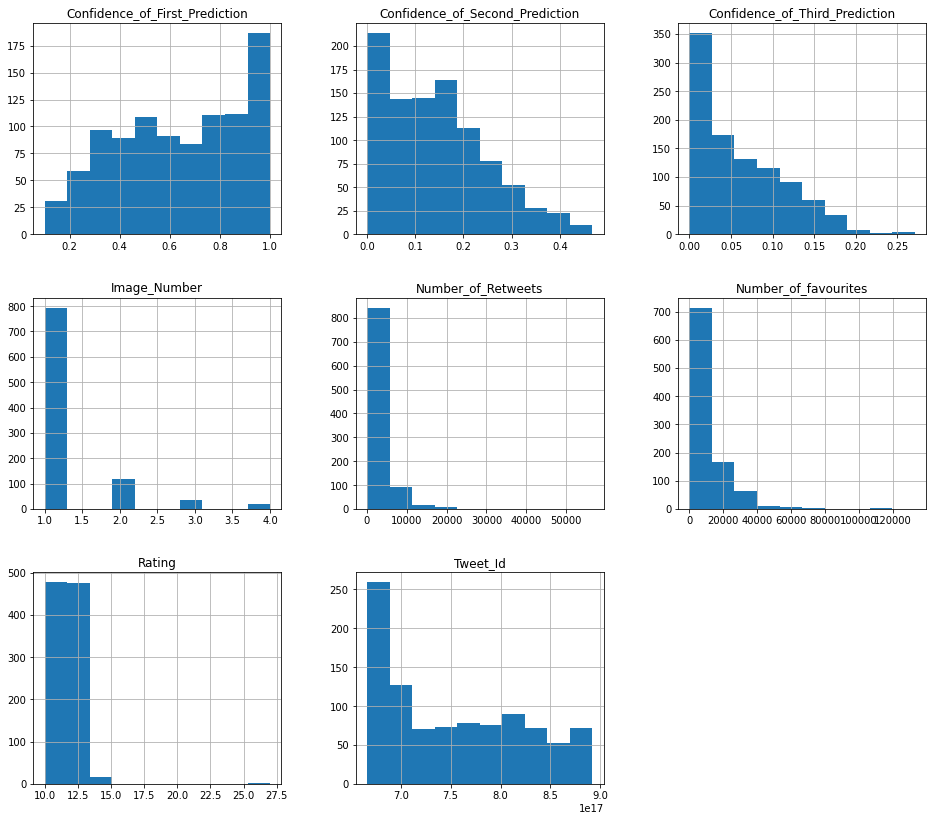

In [0]:

graph=df.select_dtypes(["int64","float64"])
graph.hist(figsize=(16,14))

Inference:
* The confidence of First Prediction is the highest and has maximum number of values having a confidence of 0.1, that is 100% confidence
* Very few values in confidence of First Prediction have values which are on the lesser side, that is, 0
* Values are alost equally distributed between 0.3 and 0.9 confidence in the confidence of First Prediction
* Maximum number have a confidence of 0, that is 0% in the confidence of the second prediction
* In the confidence of the second prediction,, as the confidence keeps on increasing, the number of tweets having that confidence keeps on decreasing
* Least number of tweets have a maximum confidence of 0.45 that is 45% in the confidence of second prediction
* The confidence of Third Prediction is the lowest as compared to the confidence of the first and the second prediction
* The confidence of the Third prediction has maximum confidence of 0.22 i.e. 22% with most number of values having 0 confidence
* Very few values having a confidence of 0.22 in the confidence of the third prediction
* Most number of tweets have retweets between 0-1000
* Very less number of tweets have tweets more than 1000
* Maximum retweets received are 5000 retweets
* A very high number of tweets are favourited upto 1500 times
* Number of tweets favourited above 1500 goes on decreasing
* Maximum number of times a tweet is favoutited is 12000
* Most of the tweets have a rating of 10-12.5
* Very few tweets have a rating above 12.5
* The maximum rating received by a tweet on a scale of 10 is 27.5
* For most number of tweets, the image number that corresponded to the most confident prediction is image number 1
* After image number 1, image number that corresponded to the most confident prediction is image number 2
* After image number 2, the image number that corresponded to the most confident prediction is image number 3
* The number of tweets for which image number 4 corresponds to the most confident predicition is the least


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


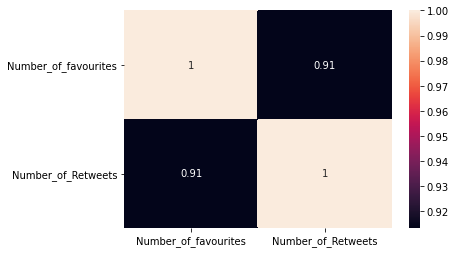

In [0]:
import seaborn as sns
corr_new=df[['Number_of_favourites','Number_of_Retweets']].corr()
sns.heatmap(corr_new,annot=True)


Inference:
* The number of retweets and the number of favourites have a high correlation
* When number of retweets is high, the number of favourites is high
* When number of retweets is less, number of favourites is less as well

In [0]:
new_plot  = df[df.Life_Cycle.str.len()<8]

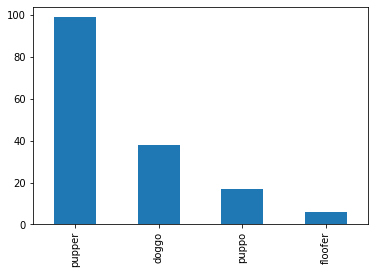

In [0]:
new_plot.Life_Cycle.value_counts().plot(kind='bar')

Inference:
* It shows the lifecycle of the dogs
* Most of the dogs have a lifecycle stage of being a of pupper
* Few ddogs are in the lifecycle stage of being a of doggo
* Very few dogs are in the lifecycle stage of being a puppo
*Lease number of dogs are in the lifecycle stage of being a floffer

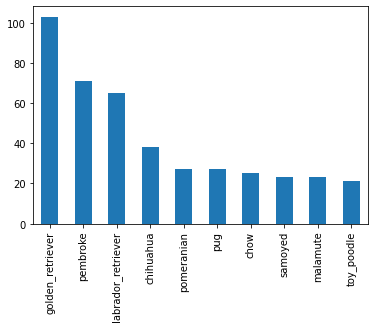

In [0]:
df['First_Prediction'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')

Inference:
* It shows the top 10 breeds that are most likely to be predicted in the First Prediction

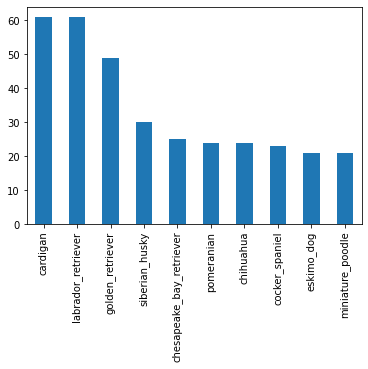

In [0]:
df['Second_Prediction'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')

Inference:
* It shows the top 10 breeds that are most likely to be predicted in the Second Prediction

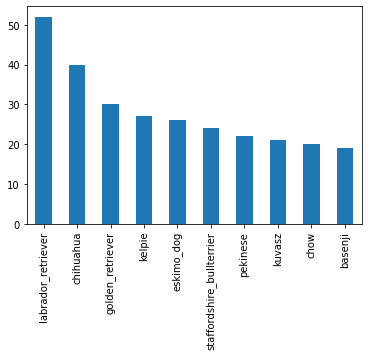

In [0]:
df['Third_Prediction'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')

Inference:
* It shows the top 10 breeds that are most likely to be predicted in the Third Prediction